# Crosstab

In [1]:
import pandas as pd
import numpy as np

In [2]:
student=pd.read_csv('data/student-mat.csv')

In [3]:
student.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
list(student.dtypes)


[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [8]:
student['sex'] = student['sex'].astype('category')

In [10]:
student['school'].astype('category')

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: category
Categories (2, object): [GP, MS]

In [11]:
student['sex'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [12]:
pd.crosstab(student['school'],student['sex'])

sex,F,M
school,,
GP,183,166
MS,25,21


In [14]:
m_f = pd.crosstab(student['school'],student['sex'], margins = True)

In [16]:
m_f['F']['MS']

25

In [18]:
m_f.loc['MS','F']

25

In [21]:
m_f.iloc[1,0]

25

In [31]:
df_mfa = pd.crosstab(student['school'],[student['address'], student['sex']])
df_mfa

address   R        U     
sex       F   M    F    M
school                   
GP       31  32  152  134
MS       13  12   12    9

In [30]:
df_mfa['U']['F']['GP']

152

In [37]:
df_mfa.iloc[0,2]

152

In [45]:
df_mfa.loc['GP','U']['F']

152

In [48]:
df_mfa.iloc[1,3]

9

In [57]:
df_mfa

address   R        U     
sex       F   M    F    M
school                   
GP       31  32  152  134
MS       13  12   12    9

In [58]:
df_mfa_2 = pd.crosstab([student['school'],student['sex']], student['address'], margins = True)
df_mfa_2

address      R    U  All
school sex              
GP     F    31  152  183
       M    32  134  166
MS     F    13   12   25
       M    12    9   21
All         88  307  395

In [64]:
df_mfa_2['R']['All']

sex
    88
Name: R, dtype: int64

In [65]:
df_mfa_2['All']['All']

sex
    395
Name: All, dtype: int64

In [70]:
df_mfa_2.query("school == ['GP']")['R']

school  sex
GP      F      31
        M      32
Name: R, dtype: int64

In [71]:
pd.crosstab(student['goout'],[student['Dalc'],student['Walc']])

Dalc    1                2                3           4           5
Walc    1   2   3  4  5  1  2   3   4  5  2  3  4  5  2  3  4  5  5
goout                                                              
1      15   3   1  1  0  0  1   1   0  0  0  0  1  0  0  0  0  0  0
2      53  20   6  2  0  1  8   5   2  0  0  1  2  0  1  0  0  1  1
3      47  30  19  2  1  0  7  13   2  0  0  2  3  1  0  1  0  0  2
4      26   7   9  8  0  0  2   9  11  1  0  4  2  3  0  0  2  2  0
5       9   5   7  2  3  0  0   1   7  4  1  1  3  2  0  0  1  1  6

In [73]:
pd.crosstab(student['school'],[student['sex'],student['traveltime']],margins = True)

sex           F               M             All
traveltime    1   2   3  4    1   2   3  4     
school                                         
GP          130  44   8  1  113  40   7  6  349
MS            9  11   4  1    5  12   4  0   46
All         139  55  12  2  118  52  11  6  395

In [74]:
pd.crosstab([student['school'],student['address']],
            [student['sex'],student['traveltime']])

sex               F             M          
traveltime        1   2  3  4   1   2  3  4
school address                             
GP     R         15  14  2  0  15   9  4  4
       U        115  30  6  1  98  31  3  2
MS     R          4   4  4  1   1   7  4  0
       U          5   7  0  0   4   5  0  0

In [75]:
pd.crosstab([student['school'],student['address']],
            [student['sex'],student['traveltime']],
           rownames = ['Escuela','Tipo_vivienda'],
           colnames = ['Sexo','Tiempo_traslado'])

Sexo                     F             M          
Tiempo_traslado          1   2  3  4   1   2  3  4
Escuela Tipo_vivienda                             
GP      R               15  14  2  0  15   9  4  4
        U              115  30  6  1  98  31  3  2
MS      R                4   4  4  1   1   7  4  0
        U                5   7  0  0   4   5  0  0

In [78]:
pd.crosstab(student['sex'], student['higher'])

higher,no,yes
sex,,
F,4,204
M,16,171


In [77]:
pd.crosstab(student['sex'], student['higher'],
           values = student['G3'], aggfunc = np.mean, margins = True)

higher,no,yes,All
sex,,,
F,7.7500,10.009804,9.966346
M,6.5625,11.321637,10.914439
All,6.8000,10.608000,10.415190


In [82]:
def funqi(x):
    if x.loc[x>8]:
        return max(x)-min(x)

In [ ]:
df['nueva'] = df[kansd].apply(lambda)

In [83]:
pd.crosstab(student['sex'], student['higher'],
           values = student['G3'], aggfunc = funqi, margins = True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [84]:
import pandas as pd
import seaborn as sns

In [85]:
df_tips = sns.load_dataset('tips')

In [86]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
pd.crosstab(index = df_tips['day'], columns = [])

,__dummy__
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [88]:
pd.crosstab(index = df_tips['day'], columns = df_tips['sex'])

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [89]:
pd.crosstab(index = df_tips['day'], columns = df_tips['sex']).rename(columns ={'Male':'hombre',
                                                                              'Female':'mujer'})

sex,hombre,mujer
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [95]:
pd.crosstab(index=df_tips['day'], 
            columns=df_tips['sex'], 
            colnames=['gender']).unstack().reset_index().rename(columns={0:'conteo de comidas servidas'})

,gender,day,conteo de comidas servidas
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [99]:
pd.crosstab(index=df_tips['day'], columns =df_tips['sex'], values = df_tips['total_bill'], colnames = ['gender'],
           aggfunc = 'mean')

gender,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


In [101]:
orange = sns.light_palette("orange", as_cmap=True)
pd.crosstab(index=[df_tips['day'], df_tips['sex']], columns=[df_tips['time'], df_tips['size']], colnames=['meal', 'party_people_size']).rename(columns={"Lunch": "count_lunch_meals_served", "Dinner": "count_dinner_meals_served"}).style.background_gradient(cmap=orange)

In [102]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [112]:
df = pd.read_csv('data/autos_imports-85.csv', header = None, names = headers, na_values='?')

In [113]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,%symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower-peak-rpm,city-mpg,highway-mpg,price,NaN,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27.0,13495.0
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27.0,16500.0
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26.0,16500.0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30.0,13950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28.0,16845.0
202,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25.0,19045.0
203,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23.0,21485.0
204,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27.0,22470.0


In [114]:
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

In [115]:
df_m = df[df.make.isin(models)].copy()

In [117]:
df_m.reset_index(inplace = True)

In [119]:
df_m.drop('index',axis = 1, inplace = True)

In [121]:
pd.crosstab(df_m.make, df_m.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [124]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,,
alfa-romero,0.0,2.0,0.0,1.0,0.0,0.0
audi,0.0,0.0,0.0,1.0,5.0,1.0
bmw,0.0,0.0,0.0,0.0,8.0,0.0
chevrolet,0.0,0.0,0.0,2.0,1.0,0.0
dodge,0.0,0.0,0.0,5.0,3.0,1.0
honda,0.0,0.0,0.0,7.0,5.0,1.0
isuzu,0.0,0.0,0.0,1.0,3.0,0.0
jaguar,0.0,0.0,0.0,0.0,3.0,0.0
make,1.0,0.0,0.0,0.0,0.0,0.0


In [126]:
pd.crosstab(df_m.make, df_m.num_doors,margins = True, margins_name = "Total")

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


In [129]:
df_m.dtypes

symboling             object
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base            object
length                object
width                 object
height                object
curb_weight           object
engine_type           object
num_cylinders         object
engine_size           object
fuel_system           object
bore                  object
stroke                object
compression_ratio     object
horsepower            object
peak_rpm              object
city_mpg              object
highway_mpg          float64
price                float64
dtype: object

In [131]:
pd.crosstab(df.make, df.body_style,values=df_m.price, aggfunc = 'mean').round(0).fillna(0)

body_style,body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,,
alfa-romero,0.0,6127.0,0.0,6529.0,0.0,0.0
audi,0.0,0.0,0.0,10295.0,7692.0,9095.0
bmw,0.0,0.0,0.0,0.0,8301.0,0.0
chevrolet,0.0,0.0,0.0,12745.0,15645.0,0.0
dodge,0.0,0.0,0.0,8714.0,13440.0,18344.0
honda,0.0,0.0,0.0,8640.0,8975.0,14869.0
isuzu,0.0,0.0,0.0,7349.0,6866.0,0.0
jaguar,0.0,0.0,0.0,0.0,7532.0,0.0
make,6479.0,0.0,0.0,0.0,0.0,0.0


In [133]:
pd.crosstab(df.make, df.body_style)

body_style,body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,,
alfa-romero,0,2,0,1,0,0
audi,0,0,0,1,5,1
bmw,0,0,0,0,8,0
chevrolet,0,0,0,2,1,0
dodge,0,0,0,5,3,1
honda,0,0,0,7,5,1
isuzu,0,0,0,1,3,0
jaguar,0,0,0,0,3,0
make,1,0,0,0,0,0


In [134]:
pd.crosstab(df.make, df.body_style, normalize=True)

body_style,body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,,
alfa-romero,0.000000,0.009709,0.000000,0.004854,0.000000,0.000000
audi,0.000000,0.000000,0.000000,0.004854,0.024272,0.004854
bmw,0.000000,0.000000,0.000000,0.000000,0.038835,0.000000
chevrolet,0.000000,0.000000,0.000000,0.009709,0.004854,0.000000
dodge,0.000000,0.000000,0.000000,0.024272,0.014563,0.004854
honda,0.000000,0.000000,0.000000,0.033981,0.024272,0.004854
isuzu,0.000000,0.000000,0.000000,0.004854,0.014563,0.000000
jaguar,0.000000,0.000000,0.000000,0.000000,0.014563,0.000000
make,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000


In [139]:
pd.crosstab(df.make, df.body_style, normalize='columns', margins = True)['hardtop'].sum()

1.0

In [136]:
pd.crosstab(df.make, df.body_style, normalize='index')

body_style,body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,,
alfa-romero,0.0,0.666667,0.000000,0.333333,0.000000,0.000000
audi,0.0,0.000000,0.000000,0.142857,0.714286,0.142857
bmw,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
chevrolet,0.0,0.000000,0.000000,0.666667,0.333333,0.000000
dodge,0.0,0.000000,0.000000,0.555556,0.333333,0.111111
honda,0.0,0.000000,0.000000,0.538462,0.384615,0.076923
isuzu,0.0,0.000000,0.000000,0.250000,0.750000,0.000000
jaguar,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
make,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [140]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style      body-style convertible     hardtop     hatchback          \
drive_wheels  drive-wheels         fwd rwd     fwd rwd       4wd fwd rwd   
make                                                                       
alfa-romero              0           0   2       0   0         0   0   1   
audi                     0           0   0       0   0         1   0   0   
bmw                      0           0   0       0   0         0   0   0   
chevrolet                0           0   0       0   0         0   2   0   
dodge                    0           0   0       0   0         0   5   0   
honda                    0           0   0       0   0         0   7   0   
isuzu                    0           0   0       0   0         0   0   1   
jaguar                   0           0   0       0   0         0   0   0   
make                     1           0   0       0   0         0   0   0   
mazda                    0           0   0       0   0         0   6   4   
mercedes-benz            0           0   1       0   2         0   0   0   
mercury                  0           0   0       0   0         0   0   1   
mitsubishi               0           0   0       0   0         0   9   0   
nissan                   0           0   0       1   0         0   2   3   
peugot                   0           0   0       0   0         0   0   0   
plymouth                 0           0   0       0   0         0   3   1   
porsche                  0           0   1       0   2         0   0   2   
renault                  0           0   0       0   0         0   1   0   
saab                     0           0   0       0   0         0   3   0   
subaru                   0           0   0       0   0         1   2   0   
toyota                   0           0   1       0   3         0   8   6   
volkswagen               0           1   0       0   0         0   1   0   
volvo                    0           0   0       0   0         0   0   0   

body_style    sedan         wagon          
drive_wheels    4wd fwd rwd   4wd fwd rwd  
make                                       
alfa-romero       0   0   0     0   0   0  
audi              1   4   0     0   1   0  
bmw               0   0   8     0   0   0  
chevrolet         0   1   0     0   0   0  
dodge             0   3   0     0   1   0  
honda             0   5   0     0   1   0  
isuzu             0   2   1     0   0   0  
jaguar            0   0   3     0   0   0  
make              0   0   0     0   0   0  
mazda             0   5   2     0   0   0  
mercedes-benz     0   0   4     0   0   1  
mercury           0   0   0     0   0   0  
mitsubishi        0   4   0     0   0   0  
nissan            0   9   0     0   3   0  
peugot            0   0   7     0   0   4  
plymouth          0   2   0     0   1   0  
porsche           0   0   0     0   0   0  
renault           0   0   0     0   1   0  
saab              0   3   0     0   0   0  
subaru            2   3   0     2   2   0  
toyota            0   7   3     2   1   1  
volkswagen        0   9   0     0   1   0  
volvo             0   0   8     0   0   3

# Pivot Tables

In [141]:
sales = pd.read_excel('data\sales-funnel.xlsx')

In [142]:
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [143]:
pd.pivot_table(sales, index = ['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [144]:
pd.pivot_table(sales, index = ['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [145]:
pd.pivot_table(sales, index = ['Manager','Rep','Name'])

Account   Price  \
Manager       Rep           Name                                            
Debra Henley  Craig Booker  Fritsch, Russel and Anderson   737550   35000   
                            Trantow-Barrows                714466   15000   
              Daniel Hilton Kiehn-Spinka                   146832   65000   
                            Kulas Inc                      218895   25000   
              John Smith    Barton LLC                     740150   35000   
                            Jerde-Hilpert                  412290    5000   
Fred Anderson Cedric Moss   Herman LLC                     141962   65000   
                            Purdy-Kunde                    163416   30000   
                            Stokes LLC                     239344    7500   
              Wendy Yule    Kassulke, Ondricka and Metz    307599    7000   
                            Keeling LLC                    688981  100000   
                            Koepp Ltd                      729833   35000   

                                                          Quantity  
Manager       Rep           Name                                    
Debra Henley  Craig Booker  Fritsch, Russel and Anderson  1.000000  
                            Trantow-Barrows               1.333333  
              Daniel Hilton Kiehn-Spinka                  2.000000  
                            Kulas Inc                     1.500000  
              John Smith    Barton LLC                    1.000000  
                            Jerde-Hilpert                 2.000000  
Fred Anderson Cedric Moss   Herman LLC                    2.000000  
                            Purdy-Kunde                   1.000000  
                            Stokes LLC                    1.000000  
              Wendy Yule    Kassulke, Ondricka and Metz   3.000000  
                            Keeling LLC                   5.000000  
                            Koepp Ltd                     2.000000

In [146]:
pd.pivot_table(sales, index = ['Manager','Rep','Name'], values = 'Price')

Price
Manager       Rep           Name                                
Debra Henley  Craig Booker  Fritsch, Russel and Anderson   35000
                            Trantow-Barrows                15000
              Daniel Hilton Kiehn-Spinka                   65000
                            Kulas Inc                      25000
              John Smith    Barton LLC                     35000
                            Jerde-Hilpert                   5000
Fred Anderson Cedric Moss   Herman LLC                     65000
                            Purdy-Kunde                    30000
                            Stokes LLC                      7500
              Wendy Yule    Kassulke, Ondricka and Metz     7000
                            Keeling LLC                   100000
                            Koepp Ltd                      35000

In [147]:
pd.pivot_table(sales, index = ['Manager','Rep'], values = 'Price', aggfunc = [sum,len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [150]:
n = pd.pivot_table(sales, index = ['Manager','Rep','Status'],values = 'Price',
                  columns = ['Product'], aggfunc = np.sum, margins = True, fill_value =0 )

In [151]:
n

Product                                   CPU  Maintenance  Monitor  Software  \
Manager       Rep           Status                                              
Debra Henley  Craig Booker  declined    35000            0        0         0   
                            pending         0         5000        0         0   
                            presented   30000            0        0     10000   
              Daniel Hilton pending     40000            0        0         0   
                            presented       0            0        0     10000   
                            won         65000            0        0         0   
              John Smith    declined    35000            0        0         0   
                            pending         0         5000        0         0   
Fred Anderson Cedric Moss   pending         0         5000        0         0   
                            presented   30000            0        0     10000   
                            won         65000            0        0         0   
              Wendy Yule    declined    65000            0        0         0   
                            presented       0            0     5000         0   
                            won        100000         7000        0         0   
All                                    465000        22000     5000     30000   

Product                                   All  
Manager       Rep           Status             
Debra Henley  Craig Booker  declined    35000  
                            pending      5000  
                            presented   40000  
              Daniel Hilton pending     40000  
                            presented   10000  
                            won         65000  
              John Smith    declined    35000  
                            pending      5000  
Fred Anderson Cedric Moss   pending      5000  
                            presented   40000  
                            won         65000  
              Wendy Yule    declined    65000  
                            presented    5000  
                            won        107000  
All                                    522000

In [156]:
m = pd.pivot_table(sales, index = ['Manager','Rep','Product'],values = ['Price','Quantity'],
                    aggfunc = {'Price':np.sum,'Quantity':np.mean}, fill_value =0 )

In [157]:
m

Price  Quantity
Manager       Rep           Product                      
Debra Henley  Craig Booker  CPU           65000       1.0
                            Maintenance    5000       2.0
                            Software      10000       1.0
              Daniel Hilton CPU          105000       2.0
                            Software      10000       1.0
              John Smith    CPU           35000       1.0
                            Maintenance    5000       2.0
Fred Anderson Cedric Moss   CPU           95000       1.5
                            Maintenance    5000       1.0
                            Software      10000       1.0
              Wendy Yule    CPU          165000       3.5
                            Maintenance    7000       3.0
                            Monitor        5000       2.0

In [160]:
final = pd.pivot_table(sales, index = ['Manager','Status'],
                columns =['Product'],
                values = ['Price','Quantity'],
                aggfunc = {'Price':np.sum,'Quantity':len}, fill_value =0 )

In [161]:
final

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  declined    70000           0       0        0        2   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              won         65000           0       0        0        1   
Fred Anderson declined    65000           0       0        0        1   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              won        165000        7000       0        0        2   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  declined            0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              won                 0       0        0  
Fred Anderson declined            0       0        0  
              pending             1       0        0  
              presented           0       1        1  
              won                 1       0        0

In [162]:
titanic = sns.load_dataset('titanic')

In [165]:
pd.crosstab(titanic.sex,titanic.survived)

survived,0,1
sex,,
female,81,233
male,468,109


In [167]:
titanic.pivot_table('survived', index = 'sex',columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [170]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [171]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [176]:
fare = pd.qcut(titanic['fare'], 3)
fare
titanic.pivot_table('survived',['sex',age],[fare,'class'], aggfunc= np.sum)

fare            (-0.001, 8.662]       (8.662, 26.0]               \
class                     First Third         First Second Third   
sex    age                                                         
female (0, 18]              NaN   7.0           NaN    7.0  14.0   
       (18, 80]             NaN  11.0           2.0   43.0  13.0   
male   (0, 18]              NaN   3.0           NaN    5.0   7.0   
       (18, 80]             0.0  20.0           0.0    6.0   4.0   

fare            (26.0, 512.329]               
class                     First Second Third  
sex    age                                    
female (0, 18]             10.0    7.0   1.0  
       (18, 80]            70.0   11.0   1.0  
male   (0, 18]              4.0    4.0   1.0  
       (18, 80]            36.0    0.0   3.0

In [177]:
#pandas.pivot_table(data, values=None, index=None, columns=None,
 #                     aggfunc='mean', fill_value=None, margins=False,
  #                    dropna=True, margins_name='All')

In [ ]:
#df.pivot_table(values,index,columns,
 #                     aggfunc='mean', fill_value=None, margins=False,
  #                    dropna=True, margins_name='All')

In [178]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [181]:

download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

# Plots 

In [182]:
import matplotlib.pyplot as plt

In [184]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods = 1000))

<AxesSubplot:>

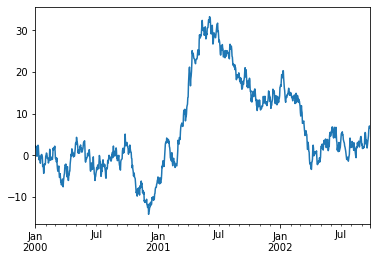

In [186]:
ts= ts.cumsum()
ts.plot()

In [188]:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index, columns = list('ABCD'))
df = df.cumsum()

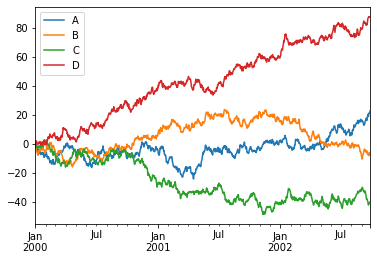

In [190]:
df.plot();

In [193]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns = ['B','C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

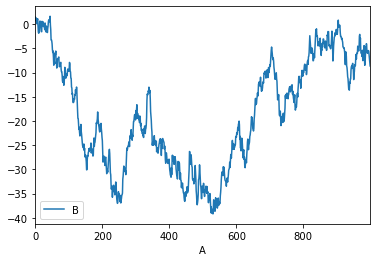

In [196]:
df3.plot(x = 'A',y = 'B');

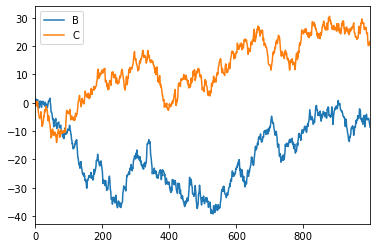

In [197]:
df3[['B','C']].plot();

<Figure size 432x288 with 0 Axes>

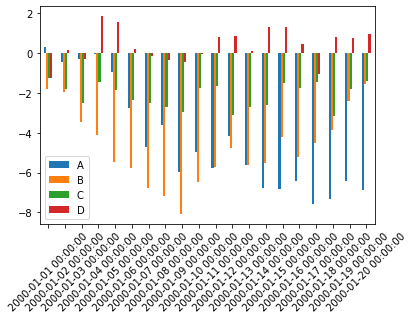

In [209]:
plt.figure()
df.iloc[:20].plot(kind = 'bar', rot = (45));

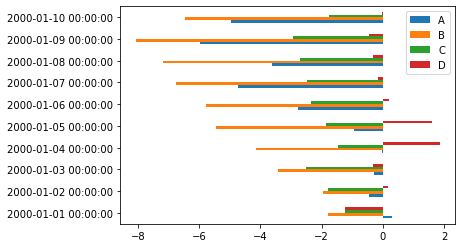

In [211]:
df.iloc[:10].plot(kind = 'barh');

In [212]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

<AxesSubplot:>

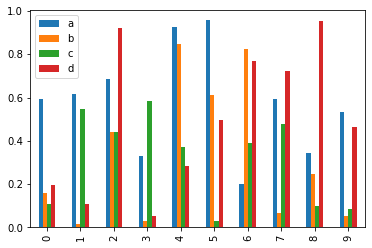

In [214]:
df2.plot(kind='bar')

<AxesSubplot:>

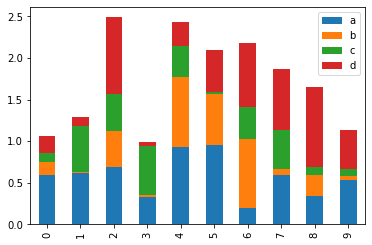

In [215]:
df2.plot.bar(stacked = True)

<AxesSubplot:>

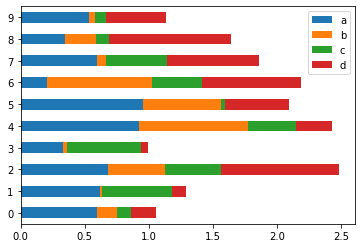

In [216]:
df2.plot.barh(stacked = True)

In [217]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

<Figure size 432x288 with 0 Axes>

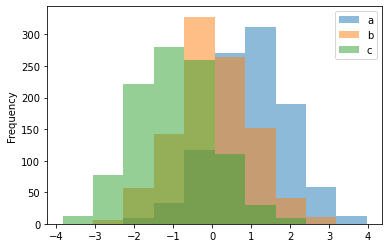

In [220]:
plt.figure()
df4.plot.hist(alpha = 0.5);

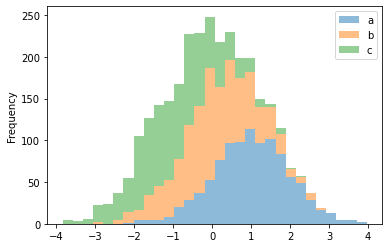

In [221]:
df4.plot.hist(stacked = True, bins= 30,alpha = 0.5);

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Gr

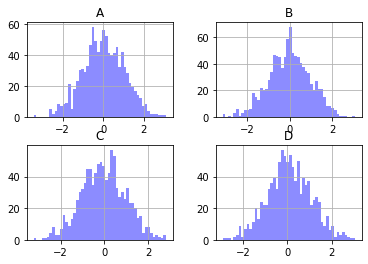

In [230]:
df.diff().hist(color = 'b', alpha = 0.45, bins = 50);

<AxesSubplot:>

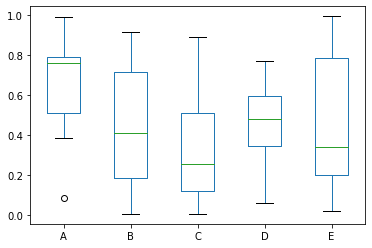

In [231]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

In [232]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}

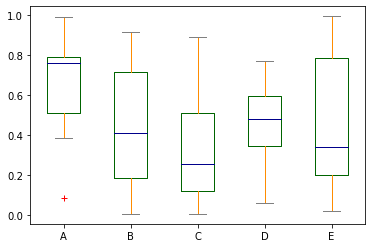

In [234]:
df.plot.box(color=color, sym='r+')
plt.savefig('data/box.png');

![box](data/box.png)

In [235]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

<AxesSubplot:>

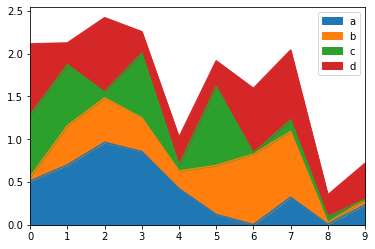

In [237]:
df.plot.area()

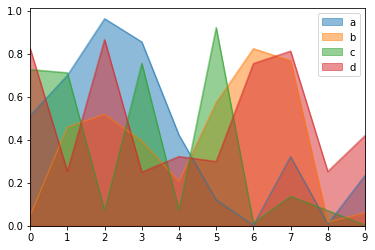

In [238]:
df.plot.area(stacked=False);

In [239]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

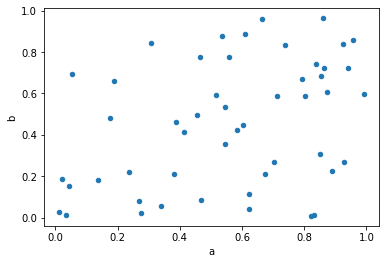

In [240]:
df.plot.scatter(x='a', y='b');

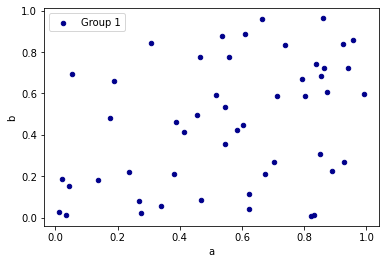

In [241]:
df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

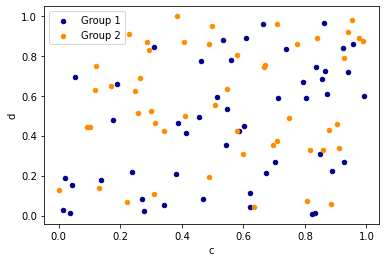

In [247]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkOrange', label='Group 2', ax=ax);

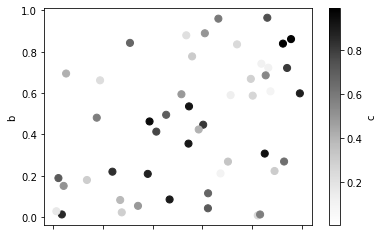

In [249]:
df.plot.scatter(x='a', y='b', c='c', s=50);

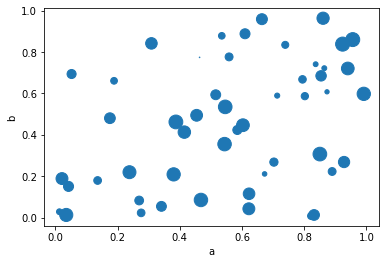

In [250]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200);